# MGA Gain Plots

This notebook plots MGA (Mean Gain Advantage) absolute gains vs parameters for:
- kRR (all parameters)
- OUE (excluding d)
- OLH (excluding d)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters from table 2 in the paper
DEFAULTS = {
    'beta': 0.05,
    'r': 1,
    'fT': 0.01,
    'epsilon': 1,
    'd': 1024
}

# Parameter ranges
RANGES = {
    'beta': np.logspace(-3, -1, 20),
    'r': np.array([1, 5, 10, 15, 20]),
    'fT': np.logspace(-3, -1, 20),
    'epsilon': np.linspace(0.5, 3.0, 20),
    'd': 2**np.arange(4, 13)
}

# Plotting style
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.size': 10,
    'axes.linewidth': 0.8,
    'xtick.major.width': 0.8,
    'ytick.major.width': 0.8
})

COLOR_MGA = '#17becf'
LINE_MGA = '-'

In [2]:
# Gain computation functions
def compute_gains_kRR(beta, r, fT, epsilon, d):
    """Compute MGA gains for kRR protocol"""
    e_eps = np.exp(epsilon)
    G_MGA = beta * (1 - fT) + beta * (d - r) / (e_eps - 1)
    return G_MGA


def compute_gains_OUE(beta, r, fT, epsilon, d):
    """Compute MGA gains for OUE protocol"""
    G_MGA = beta * (2*r - fT) + 2*beta*r / (np.exp(epsilon) - 1)
    return G_MGA


def compute_gains_OLH(beta, r, fT, epsilon, d):
    """Compute MGA gains for OLH protocol"""
    e_eps = np.exp(epsilon)
    G_MGA = beta * (2*r - fT) + 2*beta*r / (e_eps - 1)
    return G_MGA


def normalized_gain(G, fT):
    """Compute normalized gain"""
    return (G + fT) / fT

In [3]:
def compute_mga_for_param(protocol_func, param_name, param_range, use_varying_fT=False):
    """Compute MGA gains for varying a single parameter"""
    mga_gains = []

    for param_val in param_range:
        params = DEFAULTS.copy()
        params[param_name] = param_val
        G_MGA = protocol_func(**params)
        mga_gains.append(G_MGA)

    mga_gains = np.array(mga_gains)

    return mga_gains


def plot_mga_panel(ax, x_data, y_data, xlabel, xscale, ylabel, use_xticks=None, markevery=1):
    """Plot a single panel for MGA"""
    ax.plot(
        x_data, y_data,
        color=COLOR_MGA, linestyle=LINE_MGA,
        linewidth=1.5
    )

    ax.set_xscale(xscale)
    ax.set_xlabel(xlabel, fontsize=12, fontstyle='italic')
    ax.set_ylabel(ylabel, fontsize=12, fontstyle='italic')
    ax.grid(True, alpha=0.3, which='major', linestyle='-', linewidth=0.5)

    # Remove tick labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])


def create_mga_figure(protocol_func, protocol_name, param_configs):
    """Create a figure with MGA plots for multiple parameters - absolute gains only"""
    n_params = len(param_configs)
    fig, axes = plt.subplots(1, n_params, figsize=(4*n_params, 4))

    if n_params == 1:
        axes = [axes]

    for col, (param_name, xlabel, xscale, xticks, markevery) in enumerate(param_configs):
        use_varying_fT = (param_name == 'fT')

        mga_gains = compute_mga_for_param(
            protocol_func, param_name, RANGES[param_name], use_varying_fT
        )

        # Plot absolute gains
        plot_mga_panel(
            axes[col], RANGES[param_name], mga_gains,
            xlabel, xscale, r'$G$', xticks, markevery
        )

        # Adjust axis limits for specific parameters
        if param_name == 'r':
            axes[col].set_xlim([0, 21])
        elif param_name == 'epsilon':
            axes[col].set_xlim([0.4, 3.1])

    plt.tight_layout()

    return fig

## kRR Protocol - MGA vs All Parameters

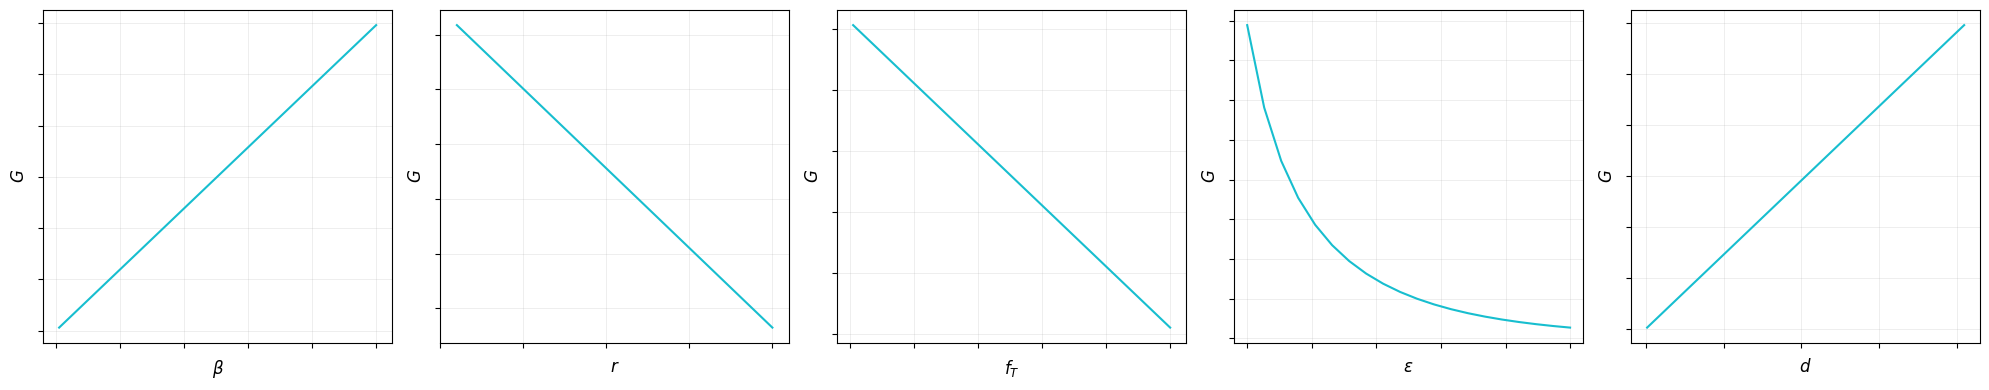

Saved: mga_kRR.png


In [4]:
# kRR: all parameters including d
param_configs_kRR = [
    ('beta', r'$\beta$', 'linear', None, 2),
    ('r', r'$r$', 'linear', [1, 5, 10, 15, 20], 1),
    ('fT', r'$f_T$', 'linear', None, 2),
    ('epsilon', r'$\varepsilon$', 'linear', [0.5, 1.0, 1.5, 2.0, 2.5, 3.0], 2),
    ('d', r'$d$', 'linear', None, 1)
]

fig_kRR = create_mga_figure(compute_gains_kRR, 'kRR', param_configs_kRR)
fig_kRR.savefig('mga_kRR.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
print("Saved: mga_kRR.png")

## OUE Protocol - MGA vs Parameters (excluding d)

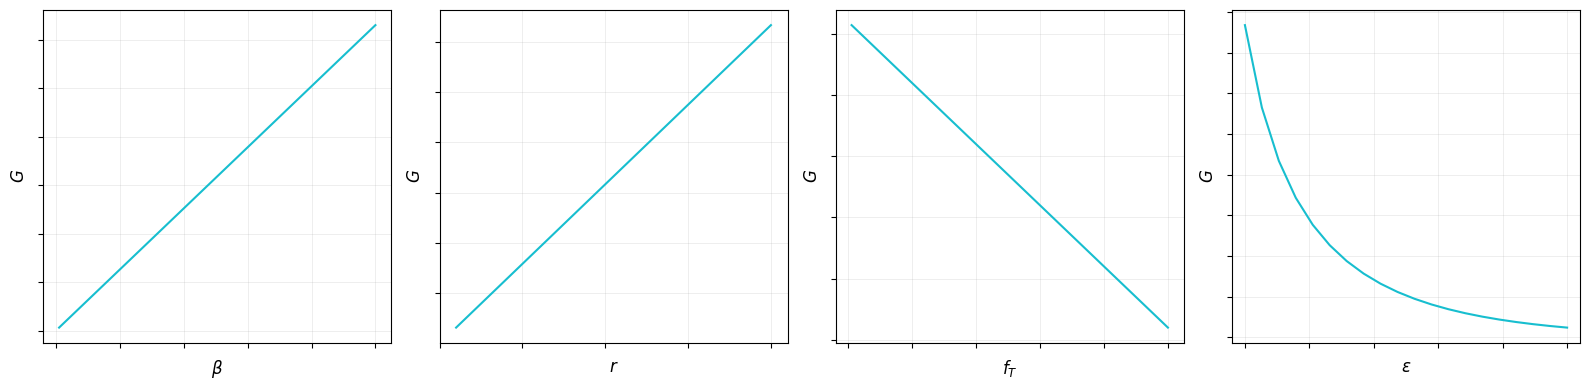

Saved: mga_OUE.png


In [5]:
# OUE: exclude d
param_configs_OUE = [
    ('beta', r'$\beta$', 'linear', None, 2),
    ('r', r'$r$', 'linear', [1, 5, 10, 15, 20], 1),
    ('fT', r'$f_T$', 'linear', None, 2),
    ('epsilon', r'$\varepsilon$', 'linear', [0.5, 1.0, 1.5, 2.0, 2.5, 3.0], 2)
]

fig_OUE = create_mga_figure(compute_gains_OUE, 'OUE', param_configs_OUE)
fig_OUE.savefig('mga_OUE.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
print("Saved: mga_OUE.png")

## OLH Protocol - MGA vs Parameters (excluding d)

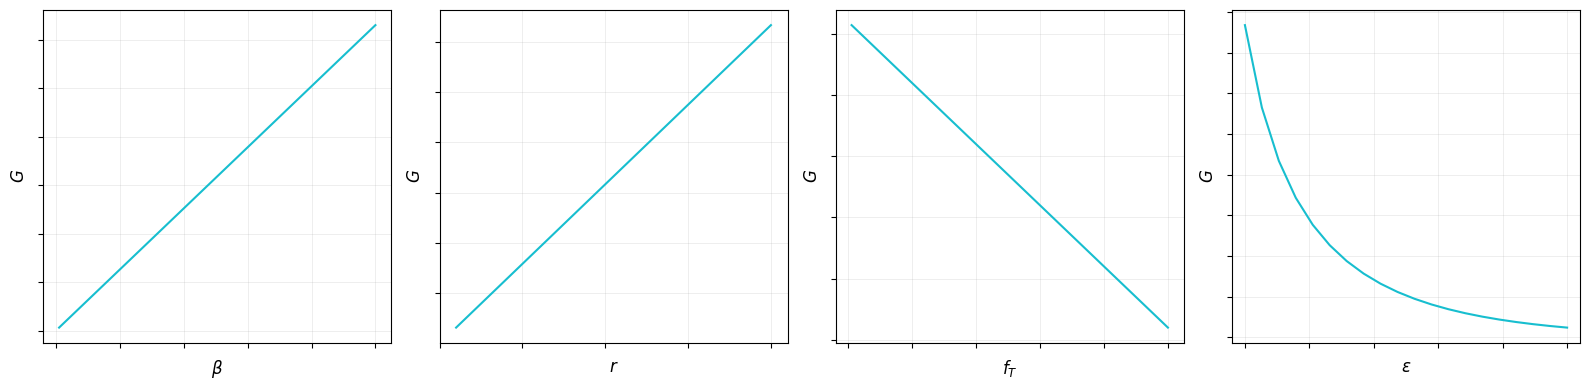

Saved: mga_OLH.png


In [6]:
# OLH: exclude d
param_configs_OLH = [
    ('beta', r'$\beta$', 'linear', None, 2),
    ('r', r'$r$', 'linear', [1, 5, 10, 15, 20], 1),
    ('fT', r'$f_T$', 'linear', None, 2),
    ('epsilon', r'$\varepsilon$', 'linear', [0.5, 1.0, 1.5, 2.0, 2.5, 3.0], 2)
]

fig_OLH = create_mga_figure(compute_gains_OLH, 'OLH', param_configs_OLH)
fig_OLH.savefig('mga_OLH.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
print("Saved: mga_OLH.png")

In [7]:
print("All MGA plots generated successfully!")

All MGA plots generated successfully!
